HOUSE PRICE PREDICTION USING LINEAR REGRESSION MODEL

Importing all required libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

Working on Train dataset

In [3]:
traindf = pd.read_csv('/content/train_csv.csv')

#print(traindf.head(5))
traindf.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [4]:
#printing first 5 rows

print(traindf.head(5))

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [5]:
#printing last 5 rows
print(traindf.tail(5))

       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  


In [6]:
numeric_df = traindf.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
correlation_matrix['price'].sort_values(ascending=False)  # Changed 'Price' to 'price' and 'desending' to 'ascending'

,price
price,1.000000
area,0.535997
bathrooms,0.517545
stories,0.420712
parking,0.384394
bedrooms,0.366494


In [7]:
print(numeric_df.head(5))

      price  area  bedrooms  bathrooms  stories  parking
0  13300000  7420         4          2        3        2
1  12250000  8960         4          4        4        3
2  12250000  9960         3          2        2        2
3  12215000  7500         4          2        2        3
4  11410000  7420         4          1        2        2


In [8]:
#printing corelation matrix
print(correlation_matrix)

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


In [9]:
req_tr = ["price","area","bedrooms","bathrooms","stories","parking"]

In [10]:
selected_tr = traindf[req_tr]

In [11]:
selected_tr.loc[:, 'TotalBath'] = (selected_tr['bathrooms'].fillna(0) +
                                    selected_tr['bathrooms'].fillna(0))
selected_tr.loc[:, 'TotalSF'] = (selected_tr['area'].fillna(0) +
                                  selected_tr['area'].fillna(0))

<ipython-input-11-804507879c1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:, 'TotalBath'] = (selected_tr['bathrooms'].fillna(0) +
<ipython-input-11-804507879c1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:, 'TotalSF'] = (selected_tr['area'].fillna(0) +


In [12]:
selected_tr

,price,area,bedrooms,bathrooms,stories,parking,TotalBath,TotalSF
0,13300000,7420,4,2,3,2,4,14840
1,12250000,8960,4,4,4,3,8,17920
2,12250000,9960,3,2,2,2,4,19920
3,12215000,7500,4,2,2,3,4,15000
4,11410000,7420,4,1,2,2,2,14840
...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,2,6000
541,1767150,2400,3,1,1,0,2,4800
542,1750000,3620,2,1,1,0,2,7240
543,1750000,2910,3,1,1,0,2,5820


Eliminating All Unecessary Colums

In [13]:
train_df = selected_tr[['price','TotalBath','area','TotalSF','bathrooms','stories']]

In [14]:
#printing selected train data
train_df

,price,TotalBath,area,TotalSF,bathrooms,stories
0,13300000,4,7420,14840,2,3
1,12250000,8,8960,17920,4,4
2,12250000,4,9960,19920,2,2
3,12215000,4,7500,15000,2,2
4,11410000,2,7420,14840,1,2
...,...,...,...,...,...,...
540,1820000,2,3000,6000,1,1
541,1767150,2,2400,4800,1,1
542,1750000,2,3620,7240,1,1
543,1750000,2,2910,5820,1,1


Spliting Data And Creating Pipeline

In [15]:
from sklearn.model_selection import train_test_split
train_set,test_set =train_test_split(train_df,test_size = 0.2,random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 436
Rows in test set:109



In [16]:
housing = train_set.drop("price",axis=1)
housing_labels = train_set["price"].copy()

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [18]:
X_train = my_pipeline.fit_transform(housing)

In [19]:
#printing x_train data
X_train

array([[ 1.53917323,  0.38416819,  0.38416819,  1.53917323,  2.58764353],
       [ 1.53917323,  0.9291807 ,  0.9291807 ,  1.53917323, -0.91249891],
       [-0.5579503 , -0.60775457, -0.60775457, -0.5579503 , -0.91249891],
       ...,
       [ 1.53917323, -0.29709744, -0.29709744,  1.53917323,  1.42092939],
       [-0.5579503 , -0.5060189 , -0.5060189 , -0.5579503 , -0.91249891],
       [ 1.53917323,  0.15707965,  0.15707965,  1.53917323,  2.58764353]])

In [20]:
X_train.shape

(436, 5)

In [21]:
Y_train = housing_labels

In [22]:
Y_train.shape

(436,)

## Correlations

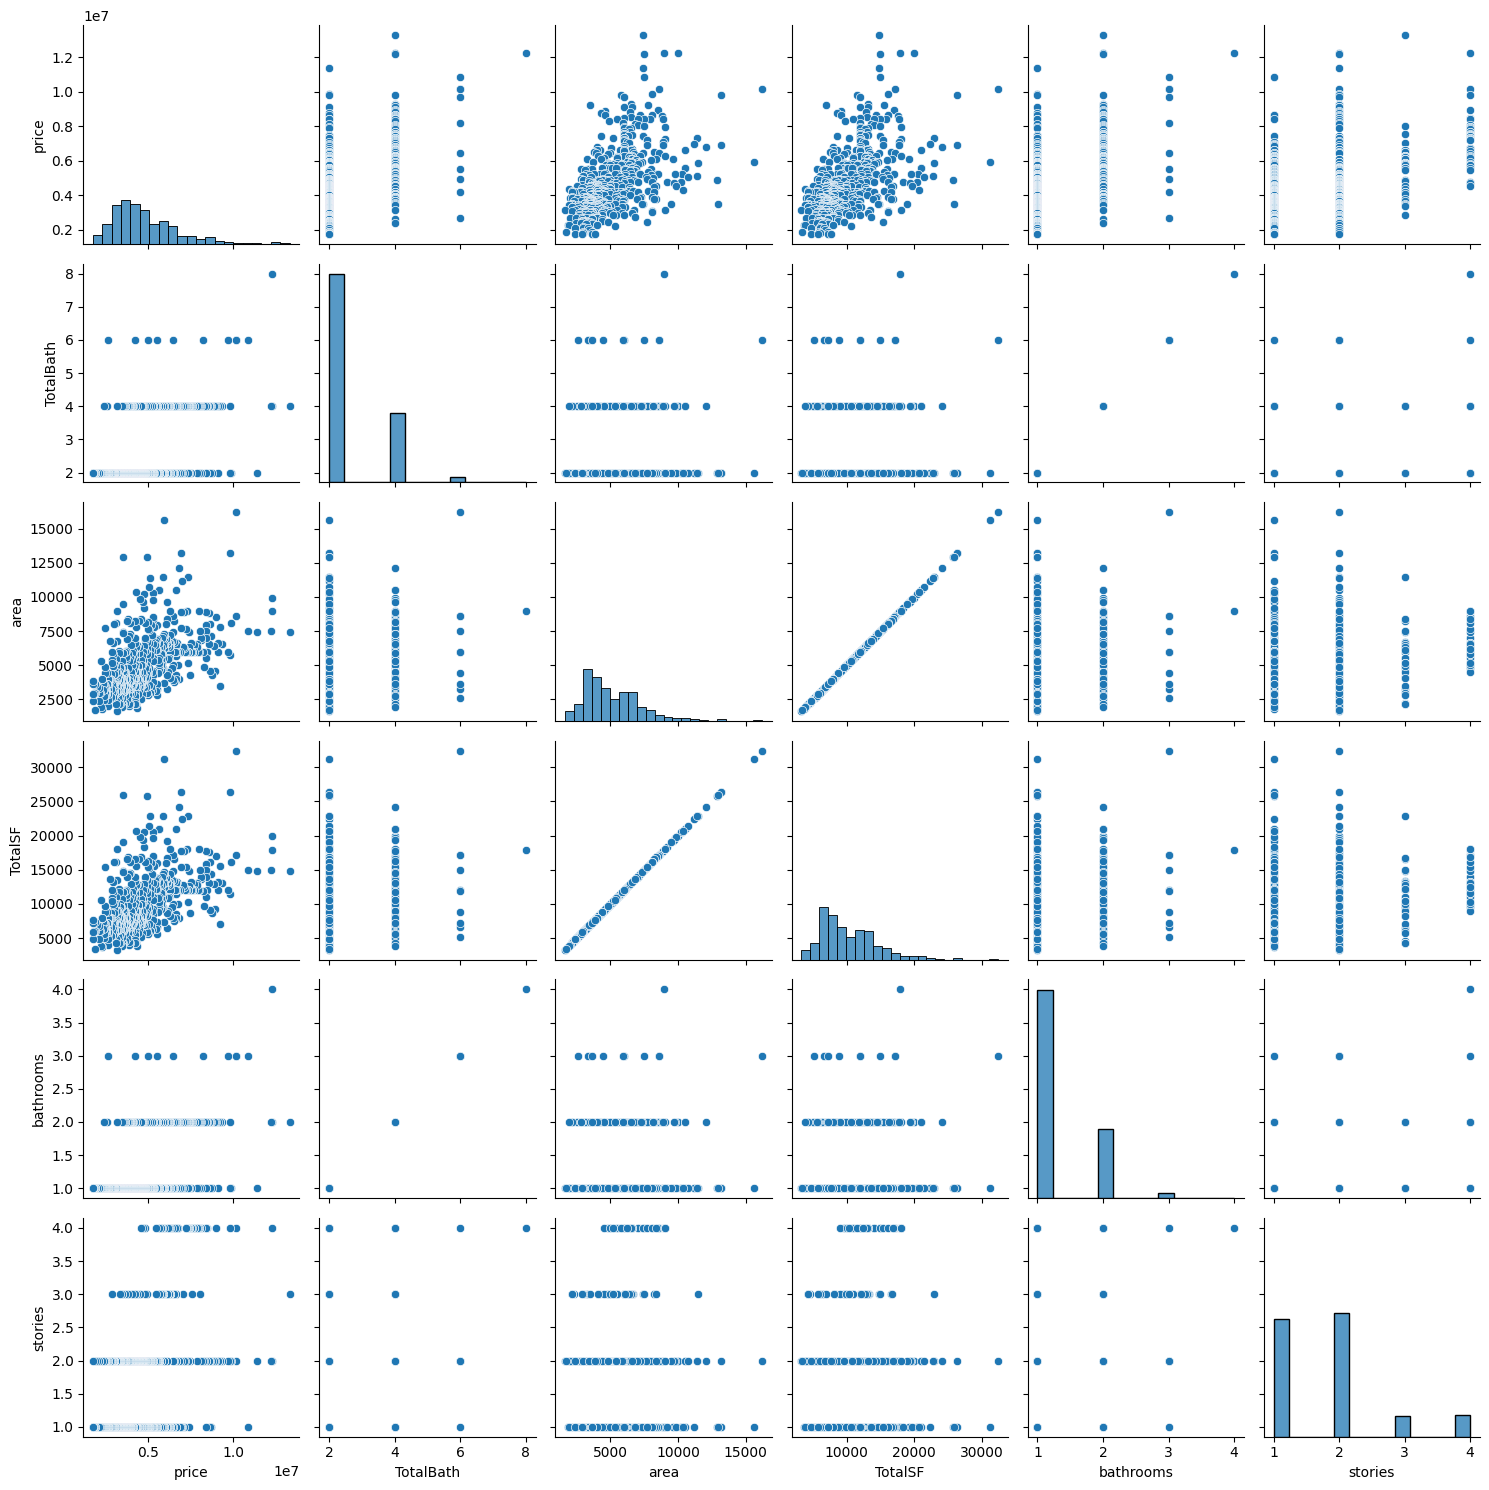

In [23]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline
sns.pairplot(train_df)
plt.tight_layout()
plt.show()

In [24]:
corr_matrix = train_df.corr()
corr_matrix['price'].sort_values(ascending = False)  # Changed 'SalePrice' to 'price'

,price
price,1.000000
area,0.535997
TotalSF,0.535997
TotalBath,0.517545
bathrooms,0.517545
stories,0.420712


<Axes: >

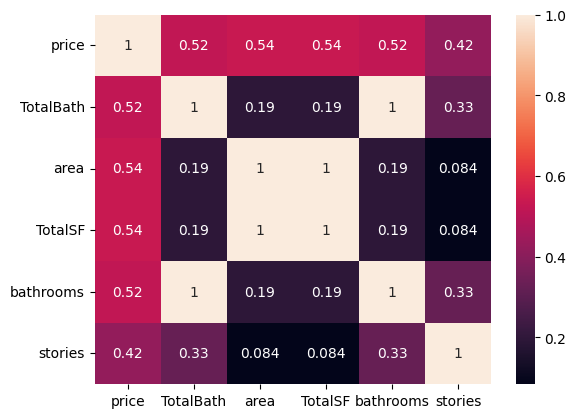

In [25]:
sns.heatmap(train_df.corr(),annot= True)

## Working with Test Dataframe

In [26]:
testdf = pd.read_csv("/content/train_csv.csv")

In [27]:
testdf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [29]:
req_tr = ["area","bedrooms","bathrooms","stories","parking"]
selected_tst = testdf[req_tr]

In [30]:
selected_tst.loc[:, 'TotalBath'] = (selected_tst['bathrooms'].fillna(0) +
                                    selected_tst['bathrooms'].fillna(0))
selected_tst.loc[:, 'TotalSF'] = (selected_tst['area'].fillna(0) +
                                  selected_tst['area'].fillna(0))

<ipython-input-30-92b93bf55440>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalBath'] = (selected_tst['bathrooms'].fillna(0) +
<ipython-input-30-92b93bf55440>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalSF'] = (selected_tst['area'].fillna(0) +


In [31]:
selected_tst

,area,bedrooms,bathrooms,stories,parking,TotalBath,TotalSF
0,7420,4,2,3,2,4,14840
1,8960,4,4,4,3,8,17920
2,9960,3,2,2,2,4,19920
3,7500,4,2,2,3,4,15000
4,7420,4,1,2,2,2,14840
...,...,...,...,...,...,...,...
540,3000,2,1,1,2,2,6000
541,2400,3,1,1,0,2,4800
542,3620,2,1,1,0,2,7240
543,2910,3,1,1,0,2,5820


In [32]:
test_df_unproc = selected_tst[['bedrooms','TotalBath','stories','TotalSF','parking']]

In [33]:
test_df_unproc

,bedrooms,TotalBath,stories,TotalSF,parking
0,4,4,3,14840,2
1,4,8,4,17920,3
2,3,4,2,19920,2
3,4,4,2,15000,3
4,4,2,2,14840,2
...,...,...,...,...,...
540,2,2,1,6000,2
541,3,2,1,4800,0
542,2,2,1,7240,0
543,3,2,1,5820,0


In [34]:
test_df = test_df_unproc.fillna(test_df_unproc.mean())

In [35]:
x_test = my_pipeline.transform(test_df[['bedrooms','TotalBath','stories','TotalSF','parking']].values)

In [36]:
x_test

array([[ 1.53917323e+00, -2.33907764e+00, -2.34021308e+00,
         3.11186580e+04,  2.54215239e-01],
       [ 1.53917323e+00, -2.33726093e+00, -2.33998599e+00,
         3.75777985e+04,  1.42092939e+00],
       [ 4.90611467e-01, -2.33907764e+00, -2.34044017e+00,
         4.17720455e+04,  2.54215239e-01],
       ...,
       [-5.57950296e-01, -2.33998599e+00, -2.34066726e+00,
         1.51805192e+04, -2.07921306e+00],
       [ 4.90611467e-01, -2.33998599e+00, -2.34066726e+00,
         1.22026038e+04, -2.07921306e+00],
       [ 4.90611467e-01, -2.33998599e+00, -2.34044017e+00,
         1.61451961e+04, -2.07921306e+00]])

## Model Selection

In [37]:
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [38]:
y_train_pred = model.predict(X_train)

In [39]:
y_train_pred[:5]

array([7209415.38772339, 6675550.        , 3808813.75      ,
       3409560.        , 3497900.        ])

In [40]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [41]:
proc_data = my_pipeline.transform(some_data)

In [42]:
model.predict(proc_data)

array([7209415.38772339, 6675550.        , 3808813.75      ,
       3409560.        , 3497900.        ])

In [43]:
list(some_labels)

[7525000, 6300000, 3920000, 3430000, 3010000]

In [44]:
train_mse = mean_squared_error(Y_train,y_train_pred)

In [45]:
train_rmse = np.sqrt(train_mse)

In [46]:
print(f"Training MSE: {train_mse:.2f}, Training RMSE: {train_rmse:.2f}")

Training MSE: 394546465307.09, Training RMSE: 628129.34


## Cross - Validation

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X_train,Y_train,scoring="neg_mean_squared_error",cv = 200)
rmse_scores = np.sqrt(-scores)

In [48]:
rmse_scores

array([ 519987.45880721,  746478.34234742, 1114953.52045002,
       1640060.78001447,  952134.38938152, 1064968.62318509,
       2278563.80376616, 1606450.04185812,  941805.72345248,
       1044761.04473484,  228314.50467565, 1571330.46355422,
       2078179.63239065, 1438126.63070167, 1012038.98504358,
       2337184.87278578, 1139873.02183283, 1545042.7089915 ,
        947120.24189121, 1480156.92454778, 1006972.61501188,
        905087.57525094, 1901800.8462099 ,  487871.45451592,
        966305.1146497 , 2295016.53381037,  867121.35353414,
       1337520.99525182, 1889197.36605245, 1390727.04283272,
       2887161.87932219, 1123733.6220124 ,  498494.73544529,
       1726736.39411717, 1245625.87545019, 1843617.62551792,
       1308379.99880675,  251144.93327639, 1805561.60812311,
        368593.51076837,  486101.72642498, 2058376.46616211,
        965943.664288  ,  404226.40084736, 1193074.96544813,
        268551.98312289,  449411.11181746,  849045.07348881,
        743581.10005735,

In [49]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation",scores.std())

In [50]:
print_scores(rmse_scores)

Scores: [ 519987.45880721  746478.34234742 1114953.52045002 1640060.78001447
  952134.38938152 1064968.62318509 2278563.80376616 1606450.04185812
  941805.72345248 1044761.04473484  228314.50467565 1571330.46355422
 2078179.63239065 1438126.63070167 1012038.98504358 2337184.87278578
 1139873.02183283 1545042.7089915   947120.24189121 1480156.92454778
 1006972.61501188  905087.57525094 1901800.8462099   487871.45451592
  966305.1146497  2295016.53381037  867121.35353414 1337520.99525182
 1889197.36605245 1390727.04283272 2887161.87932219 1123733.6220124
  498494.73544529 1726736.39411717 1245625.87545019 1843617.62551792
 1308379.99880675  251144.93327639 1805561.60812311  368593.51076837
  486101.72642498 2058376.46616211  965943.664288    404226.40084736
 1193074.96544813  268551.98312289  449411.11181746  849045.07348881
  743581.10005735  392494.62077654 1714221.18347922  833444.71655046
  209790.24784029 1095326.29885285  521530.22769672  913531.4567702
 1344130.43554994 1764910.90

In [51]:
y_pred=model.predict(x_test)

In [52]:
y_pred

array([3743180.        , 3938900.        , 3557680.        ,
       3938900.        , 3743180.        , 3557680.        ,
       3743180.        , 3713225.83333333, 3743180.        ,
       3007308.5       , 3557680.        , 3743180.        ,
       3713225.83333333, 3743180.        , 3007308.5       ,
       3743180.        , 3713225.83333333, 3557680.        ,
       3557680.        , 3007308.5       , 3557680.        ,
       3557680.        , 3007308.5       , 3007308.5       ,
       3557680.        , 3743180.        , 3007308.5       ,
       3007308.5       , 3743180.        , 3713225.83333333,
       3557680.        , 3557680.        , 3713225.83333333,
       3007308.5       , 3713225.83333333, 3557680.        ,
       3007308.5       , 3743180.        , 3557680.        ,
       3713225.83333333, 3007308.5       , 3007308.5       ,
       3557680.        , 3743180.        , 3713225.83333333,
       3007308.5       , 3007308.5       , 3803718.33333333,
       3007308.5       ,

In [55]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('/content/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)